In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

import scipy as sp
import seaborn as sns

In [2]:
def dist_euclidian(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2),axis=1))

In [3]:
def arch_generator(input_size=13 , output_size=10):
    weigths = np.random.random_sample((output_size * output_size, input_size))
    return [input_size,output_size,weigths]

In [4]:
def kohonen(architect, data_input, eta=0.1, epochs=100):
    
    neighborhood = architect[1]//3
    
    samples_size = data_input.shape[0]
    grid_size = architect[1]*architect[1]
    
    for t in np.arange(epochs):
        E = eta /(t+1)
        V = int(neighborhood - (neighborhood * ((t + 1) / 100))) + 1
        for ii in np.arange(samples_size):
            data_ref = data_input[ii,]
            BMU = np.argmin(dist_euclidian(data_ref,architect[2]))
            Ib = BMU // architect[1]
            Jb = BMU % architect[1]
            for jj in np.arange(grid_size):
                I = jj // architect[1]
                J = jj % architect[1]
                if (np.abs(Ib - I) + np.abs(Jb - J)) <= V:
                    architect[2][jj,] = architect[2][jj,] + E*(data_input[ii,] - architect[2][jj,])
    
    return architect

In [5]:
wine = load_wine()

wine_df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
wine_df["target"] = wine["target"]

In [6]:
wine_data = wine_df[wine_df.columns[:-1]]

# Normalization
wine_data = (wine_data - wine_data.min()) / (wine_data.max() - wine_data.min())

target = wine_df.target

In [7]:
output_size = 12
wine_model = arch_generator(len(wine_data.columns), output_size)

wine_trained = kohonen(wine_model,wine_data.values)

Initialization


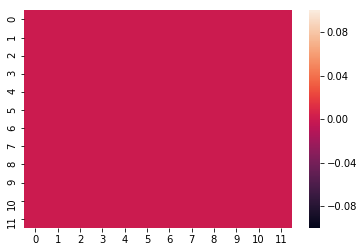

Final


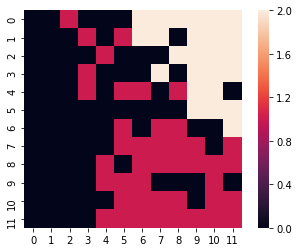

In [8]:
I = np.zeros((output_size,output_size))
print("Initialization")
sns.heatmap(I)
plt.show()

filenames = []
for ii in wine_data.index:
    BMU = np.argmin(dist_euclidian( wine_data.loc[ii].values, wine_model[2]))
    I[ BMU // output_size ][ BMU % output_size ] = target.loc[ii]
    
    plt.imshow(I, cmap='plasma')
    ref_filename = "./{:s}/kohonen {:d}.png".format("img", ii)
    
    filenames += [ref_filename]
    plt.savefig(ref_filename)

print("Final")
sns.heatmap(I)

In [9]:
import imageio

images = []
for filename in filenames:
    images.append(imageio.imread(filename, format='png'))
imageio.mimsave('./heatmap.gif', images)